In [1]:
import sys 
import pathlib
import os
import numpy as np
import pandas as pd
#sys.path.append(os.path.abspath("/eos/home-b/bjlindst/SWAN_projects/lib"))
#import twissParser as tp
#import lossMapTools as lmt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import lossmaps as lm
import pickle
np.set_printoptions(linewidth=100)
import scipy

No pytransport functionality
No pytransport functionality


# Phase advance study

/tmp/cmaccani/ipykernel_29073/984789543.py:2: RuntimeWarning: divide by zero encountered in divide
  return n2/np.sin(x) - n1/np.tan(x)
/tmp/cmaccani/ipykernel_29073/984789543.py:2: RuntimeWarning: invalid value encountered in subtract
  return n2/np.sin(x) - n1/np.tan(x)


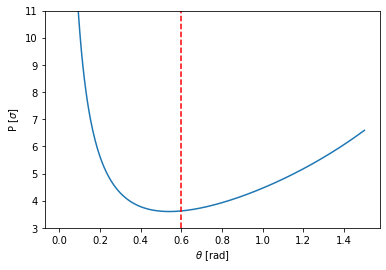

In [2]:
def func(x, n1=6, n2=7):
    return n2/np.sin(x) - n1/np.tan(x)

n1=6
n2=7
x = np.linspace(0, 1.5, 400)
y = func(x)

plt.plot(x, y)
plt.ylim(3, 11)
plt.vlines(np.sqrt(n2**2-n1**2)/n1, 3, 11, colors='r', linestyles='dashed')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'P $[\sigma]$')
plt.show()

In [3]:
mux=np.arange(0.1,4*np.pi/2,np.pi/200)
#mux=np.arange(0.01,4*np.pi/2,np.pi/200)
#np.tan(mux)

/tmp/cmaccani/ipykernel_29073/2834874161.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


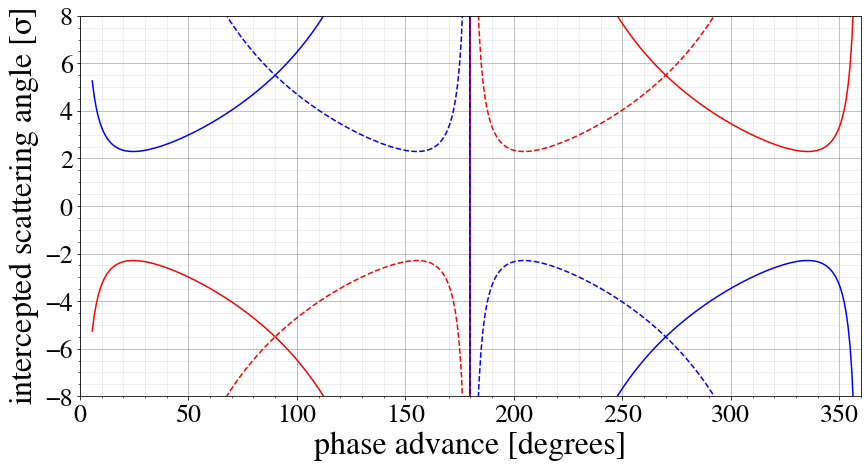

In [4]:
font = font_manager.FontProperties(family='Nimbus Roman', style='normal', size=24)
myFont = {'size': 32, 'fontname': 'Nimbus Roman'}
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Nimbus Roman'
plt.rcParams['mathtext.it'] = 'Nimbus Roman'
plt.rcParams['mathtext.bf'] = 'Nimbus Roman:bold'
axis_color = 'lightgoldenrodyellow'

n1=5
n2=5.5

fig, ax = plt.subplots(figsize=(14,7))
#ax.plot(mux,10.4/np.sin(mux)-6.7/np.tan(mux),color='black',linestyle='-')
ax.plot(mux*180/np.pi,-n2/np.sin(mux)-n1/np.tan(mux),color='red',linestyle='--') # LOWER JAW 1, UPPER JAW 2
ax.plot(mux*180/np.pi,n2/np.sin(mux)-n1/np.tan(mux),color='blue',linestyle='-')  # UPPER JAW 1, UPPER JAW 2
ax.plot(mux*180/np.pi,-n2/np.sin(mux)+n1/np.tan(mux),color='red',linestyle='-')  # LOWER JAW 1, LOWER JAW 2
ax.plot(mux*180/np.pi,n2/np.sin(mux)+n1/np.tan(mux),color='blue',linestyle='--') # UPPER JAW 1, LOWER JAW 2
#ax.plot(mux,13.2/np.sin(mux)-8.5/np.tan(mux),color='green',linestyle='-')

plt.ylim([-8,8])
plt.xlim([0.,360])

plt.ylabel(r'intercepted scattering angle [$\sigma$]', fontdict=myFont)
plt.xlabel('phase advance [degrees]', fontdict=myFont)
plt.yticks(font='Nimbus Roman',size=26)
plt.xticks(font='Nimbus Roman',size=26)
#plt.legend(['15cm tight','15cm relaxed','20cm relaxed'],loc='best',prop=font, ncol=2,handleheight=0, labelspacing=0.05)
plt.minorticks_on()
plt.grid( which='minor', color='#999999', linestyle='-', alpha=0.2) #b=True,
plt.grid( which='major', color='#666666', linestyle='-', alpha=0.5) #b=True,

#plt.axvline(88.7456/180*np.pi,0,17,color='black',linestyle='--') # cry1V IP5 b1
#plt.axvline(84.8528/180*np.pi,0,17,color='black',linestyle='--') # cry1V IP1 b1
##plt.axvline(16.8356/180*np.pi,0,17,color='black',linestyle='--') # cry1V IP5 b2
#plt.axvline(34.8216/180*np.pi,0,17,color='red',linestyle='--') # cry1V IP1 b2

#plt.axvline(2.1314/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP5 b1
#plt.axvline(22.8636/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP1 b1
#plt.axvline(68.4022/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP5 b2
#plt.axvline(80.6614/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP1 b2

plt.axhline(9,0,350,color='black')
plt.axhline(-9,0,350,color='black')


#plt.savefig("plots/generalPerformance/phaseAdvance.png", bbox_inches='tight',facecolor='white', transparent=False, dpi=400)
fig.show()



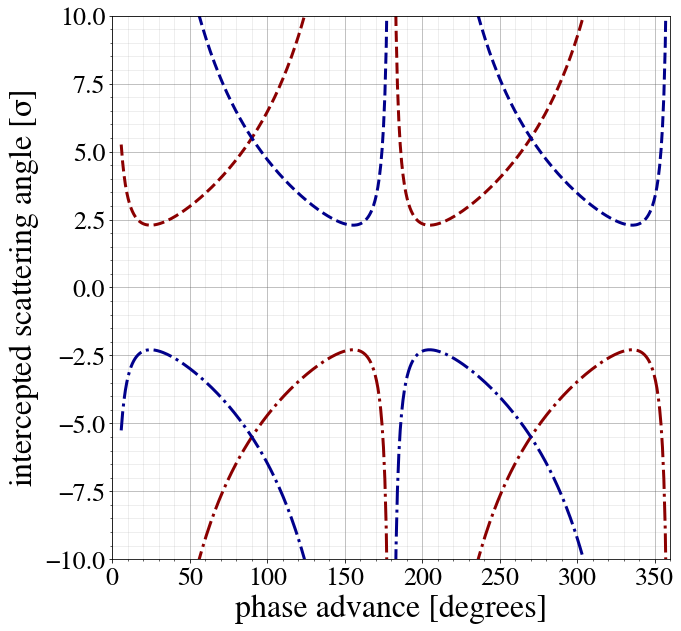

In [5]:


font = font_manager.FontProperties(family='Nimbus Roman', style='normal', size=24)
myFont = {'size': 32, 'fontname': 'Nimbus Roman'}
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Nimbus Roman'
plt.rcParams['mathtext.it'] = 'Nimbus Roman'
plt.rcParams['mathtext.bf'] = 'Nimbus Roman:bold'
axis_color = 'lightgoldenrodyellow'

n1=5
n2=5.5
disp=-5.8*0

theta=np.arctan(np.sqrt(n2**2-n1**2)/n1)
deltax=n2/np.sin(theta)-n1/np.tan(theta)


fig, ax = plt.subplots(figsize=(10,10))
# pos jaw pos kick
ax.plot(mux*180/np.pi,n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)-n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkred',linestyle='--',linewidth=3)

# pos jaw neg kick
ax.plot(mux*180/np.pi,-n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)-n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkred',linestyle='-.',linewidth=3)

# neg jaw pos kick
ax.plot(mux*180/np.pi,n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)+n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkblue',linestyle='--',linewidth=3)

# neg jaw neg kick
ax.plot(mux*180/np.pi,-n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)+n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkblue',linestyle='-.',linewidth=3)

plt.ylim([-10,10])
plt.xlim([0.,360])

plt.ylabel(r'intercepted scattering angle [$\sigma$]', fontdict=myFont)
plt.xlabel('phase advance [degrees]', fontdict=myFont)
plt.yticks(font='Nimbus Roman',size=26)
plt.xticks(font='Nimbus Roman',size=26)
#plt.legend(['15cm tight','15cm relaxed','20cm relaxed'],loc='best',prop=font, ncol=2,handleheight=0, labelspacing=0.05)
plt.minorticks_on()
plt.grid( which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.grid( which='major', color='#666666', linestyle='-', alpha=0.5)

#plt.savefig("collCut2.png", bbox_inches='tight',facecolor='white', transparent=False, dpi=400)



Optimal phase advance betweent tcp at 5 and cry1 at 5.5:  24.6199773286571 [deg]
Delta P betweent tcp at 5 and cry1 at 5.5: 2.2912878474779212 [sigma]  


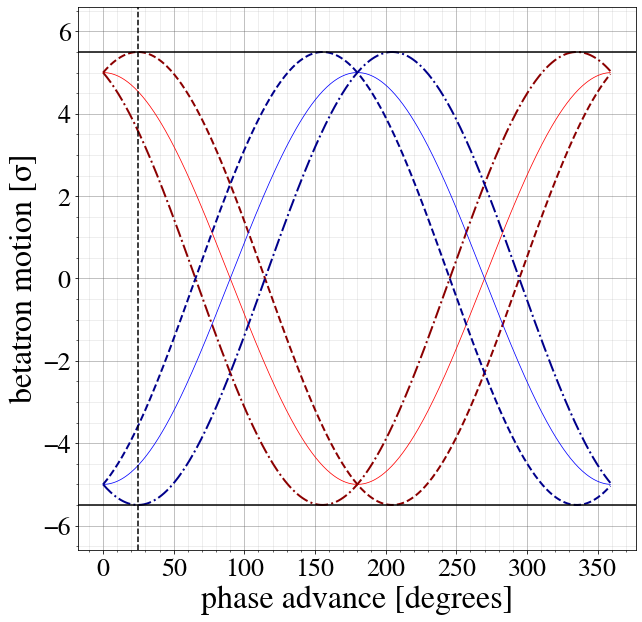

In [6]:
font = font_manager.FontProperties(family='Nimbus Roman', style='normal', size=24)
myFont = {'size': 32, 'fontname': 'Nimbus Roman'}
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Nimbus Roman'
plt.rcParams['mathtext.it'] = 'Nimbus Roman'
plt.rcParams['mathtext.bf'] = 'Nimbus Roman:bold'
axis_color = 'lightgoldenrodyellow'

fig, ax = plt.subplots(figsize=(10,10))

tcp=5
cry1=5.5

theta=np.arctan(np.sqrt(cry1**2-tcp**2)/tcp)
deltax=cry1/np.sin(theta)-tcp/np.tan(theta)

print(f"Optimal phase advance betweent tcp at {tcp} and cry1 at {cry1}: ", theta*180/np.pi, '[deg]')
print(f"Delta P betweent tcp at {tcp} and cry1 at {cry1}:", deltax, '[sigma]  ')

xx=np.arange(0,2*np.pi,np.pi/200)
#deltax=cry1*0.55
plt.plot(xx*180/np.pi,tcp*np.cos(xx),color='red',linewidth=0.75)                                     # trajectory without kick, upper jaw
plt.plot(xx*180/np.pi,tcp*np.cos(xx)+1*deltax*np.sin(xx),color='darkred',linestyle='--',linewidth=2) # trajectory with positive kick, upper jaw
plt.plot(xx*180/np.pi,tcp*np.cos(xx)-1*deltax*np.sin(xx),color='darkred',linestyle='-.',linewidth=2) # trajectory with negative kick, upper jaw

plt.plot(xx*180/np.pi,-tcp*np.cos(xx),color='blue',linewidth=0.75)                                   # trajectory without kick, lower jaw
plt.plot(xx*180/np.pi,-tcp*np.cos(xx)+deltax*np.sin(xx),color='darkblue',linestyle='--',linewidth=2) # trajectory with positive kick, lower jaw
plt.plot(xx*180/np.pi,-tcp*np.cos(xx)-deltax*np.sin(xx),color='darkblue',linestyle='-.',linewidth=2) # trajectory with negative kick, lower jaw
#plt.axvline( 90/180*np.pi,0,17,color='black',linestyle='--')
#plt.axvline(180/180*np.pi,0,17,color='black',linestyle='--')
#plt.axvline(270/180*np.pi,0,17,color='black',linestyle='--')
#plt.axvline(360/180*np.pi,0,17,color='black',linestyle='--')
plt.axvline(theta*180/np.pi,0,17,color='black',linestyle='--')
#plt.axvline(360-theta*180/np.pi,0,17,color='black',linestyle='--')


plt.axhline(cry1,0,17,color='black',linestyle='-')
plt.axhline(-cry1,0,17,color='black',linestyle='-')

plt.ylim([-1.2*cry1,1.2*cry1])


plt.ylabel(r'betatron motion [$\sigma$]', fontdict=myFont)
plt.xlabel('phase advance [degrees]', fontdict=myFont)
plt.yticks(font='Nimbus Roman',size=26)
plt.xticks(font='Nimbus Roman',size=26)
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.grid( which='major', color='#666666', linestyle='-', alpha=0.5)

#plt.savefig("betaMotion2.png", bbox_inches='tight',facecolor='white', transparent=False, dpi=400)

# Line phase advance

In [7]:
import json
import numpy as np
from pathlib import Path
import sys
import os
import yaml

import xobjects as xo
import xtrack as xt
import xpart as xp
import xcoll as xc

Functions

In [8]:
def find_axis_intercepts(x_coords, y_coords):
    x_intercepts = []
    y_intercepts = []

    for i in range(len(x_coords)):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % len(x_coords)], y_coords[(i + 1) % len(y_coords)]

        if x1 == x2:
        # Vertical line, no y-intercept
            y_intercept = 0.0 if x1 == x2 == 0.0 else None
        else:
            slope = (y2 - y1) / (x2 - x1)
            y_intercept = y1 - (slope * x1)

        if y1 == y2:
        # Horizontal line, no x-intercept
            x_intercept = 0.0 if y1 == y2 == 0.0 else None
        else:
            slope = (x2 - x1) / (y2 - y1)
            x_intercept = x1 - (slope * y1)

        # Check if the x-intercept is within the range of x1 and x2
        if x_intercept is not None and (x1 <= x_intercept <= x2 or x2 <= x_intercept <= x1):
            x_intercepts.append(x_intercept)

        # Check if the y-intercept is within the range of y1 and y2
        if y_intercept is not None and (y1 <= y_intercept <= y2 or y2 <= y_intercept <= y1):
            y_intercepts.append(y_intercept)

    return x_intercepts, y_intercepts



def find_bad_offset_apertures(line):
    aperture_offsets = {}
    for name, element in line.element_dict.items():
        if 'offset' in name and element.__class__.__name__.startswith('XYShift'):
            aper_name = name.split('_offset')[0]
            aperture_offsets[aper_name] = (element.dx, element.dy)

    bad_apers = {}
    for ap_name, offset in aperture_offsets.items():
        aperture_el = line.element_dict[ap_name]

        cname= aperture_el.__class__.__name__
        ap_dict = aperture_el.to_dict()

        if cname == 'LimitEllipse':
            x_min = -ap_dict['a']
            x_max = ap_dict['a']
            y_min = -ap_dict['b']
            y_max = ap_dict['b']
        elif cname == 'LimitRect':
            x_min = ap_dict['min_x']
            x_max = ap_dict['max_x']
            y_min = ap_dict['min_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitRectEllipse':
            x_min = -ap_dict['max_x']
            x_max = ap_dict['max_x']
            y_min = -ap_dict['max_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitRacetrack':
            x_min = ap_dict['min_x']
            x_max = ap_dict['max_x']
            y_min = ap_dict['min_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitPolygon':
            x_intercepts, y_intercepts = find_axis_intercepts(ap_dict['x_vertices'],
                                                            ap_dict['y_vertices'])
            x_min = min(x_intercepts)
            x_max = max(x_intercepts)
            y_min = min(y_intercepts)
            y_max = max(y_intercepts)

        tolerance = 5e-3
        """if (x_max - offset[0] < tolerance 
            or -x_min + offset[0] < tolerance 
            or y_max - offset[1] < tolerance 
            or -y_min + offset[1] < tolerance):"""
        if (offset[0] -x_max > tolerance 
            or  -offset[0] + x_min > tolerance 
            or  offset[1] - y_max > tolerance 
            or  -offset[1] + y_min > tolerance ):
                bad_apers[ap_name] = (x_min, x_max, y_min, y_max, offset[0], offset[1])

    return bad_apers

Loading

In [9]:
beam          = 2   #run_dict['beam']
plane         = "V" #run_dict['plane']
TCCS_name     = 'tccs.5r3.b2'
TCCP_name     = 'tccp.4l3.b2'
TARGET_name   = 'target.4l3.b2'
TCLA_name     = 'tcla.a5l3.b2'
TCP_name      = f"tcp.{'c' if plane=='H' else 'd'}6{'l' if beam=='1' else 'r'}7.b{beam}"
context = xo.ContextCpu(omp_num_threads='auto')

In [10]:
coll_file_RUN3 = os.path.expandvars('${HOME_TWOCRYST}/input_files/colldbs/flat_top.yaml')
line_name_RUN3 = os.path.expandvars("${HOME_TWOCRYST}/input_files/2024_Run3/flat_top_b2.json")
particle_ref_RUN3 = xp.Particles(p0c=6800e9, q0=1, mass0=xp.PROTON_MASS_EV)

In [17]:
coll_file_HL_IR7 = os.path.expandvars('${HOME_TWOCRYST}/input_files/colldbs/HL_tight_twocryst.yaml')
line_name_HL_IR7 = os.path.expandvars("${HOME_TWOCRYST}/input_files/HL_IR7_rematched/b4_sequence_patched.json")
particle_ref_HL = xp.Particles(p0c=7000e9, q0=1, mass0=xp.PROTON_MASS_EV)

In [21]:
coll_file_HL_IR7_IR3 = os.path.expandvars('${HOME_TWOCRYST}/input_files/colldbs/HL_tight_twocryst.yaml')
line_name_HL_IR7_IR3 = os.path.expandvars("${HOME_TWOCRYST}/input_files/HL_IR7_IR3_rematched/b4_sequence.json")
particle_ref_HL= xp.Particles(p0c=7000e9, q0=1, mass0=xp.PROTON_MASS_EV)

In [11]:
import io

def load_colldb_new(filename):
    with open(filename, "r") as infile:
        coll_data_string = ""
        family_settings = {}
        family_types = {}
        onesided = {}
        tilted = {}
        bend = {}
        xdim = {}
        ydim = {}

        for l_no, line in enumerate(infile):
            if line.startswith("#"):
                continue  # Comment
            if len(line.strip()) == 0:
                continue  # Empty line
            sline = line.split()
            if len(sline) < 6 or sline[0].lower() == "crystal" or sline[0].lower() == "target":
                if sline[0].lower() == "nsig_fam":
                    family_settings[sline[1]] = sline[2]
                    family_types[sline[1]] = sline[3]
                elif sline[0].lower() == "onesided":
                    onesided[sline[1]] = int(sline[2])
                elif sline[0].lower() == "tilted":
                    tilted[sline[1]] = [float(sline[2]), float(sline[3])]
                elif sline[0].lower() == "crystal":
                    bend[sline[1]] = float(sline[2])
                    xdim[sline[1]] = float(sline[3])
                    ydim[sline[1]] = float(sline[4])
                elif sline[0].lower() == "target":
                    xdim[sline[1]] = float(sline[2])
                    ydim[sline[1]] = float(sline[3])
                elif sline[0].lower() == "settings":
                    pass  # Acknowledge and ignore this line
                else:
                    raise ValueError(f"Unknown setting {line}")
            else:
                coll_data_string += line

    names = ["name", "opening", "material", "length", "angle", "offset"]

    df = pd.read_csv(io.StringIO(coll_data_string), delim_whitespace=True,
                     index_col=False, skip_blank_lines=True, names=names)

    df["angle"] = df["angle"] 
    df["name"] = df["name"].str.lower() # Make the names lowercase for easy processing
    df["nsigma"] = df["opening"].apply(lambda s: float(family_settings.get(s, s)))
    df["type"] = df["opening"].apply(lambda s: family_types.get(s, "UNKNOWN"))
    df["side"] = df["name"].apply(lambda s: onesided.get(s, 0))
    df["bend"] = df["name"].apply(lambda s: bend.get(s, 0))
    df["xdim"] = df["name"].apply(lambda s: xdim.get(s, 0))
    df["ydim"] = df["name"].apply(lambda s: ydim.get(s, 0))
    df["tilt_left"] = df["name"].apply(lambda s: np.deg2rad(tilted.get(s, [0, 0])[0]))
    df["tilt_right"] = df["name"].apply(lambda s: np.deg2rad(tilted.get(s, [0, 0])[1]))
    df = df.set_index("name").T

    # Ensure the collimators marked as one-sided or tilted are actually defined
    defined_set = set(df.columns) # The data fram was transposed so columns are names
    onesided_set = set(onesided.keys())
    tilted_set = set(tilted.keys())
    if not onesided_set.issubset(defined_set):
        different = onesided_set - defined_set
        raise SystemExit('One-sided collimators not defined: {}'.format(", ".join(different)))
    if not tilted_set.issubset(defined_set):
        different = tilted_set - defined_set
        raise SystemExit('Tilted collimators not defined: {}'.format(",".join(different)))
    return df.T

In [13]:
def load_line(line_name, coll_file, particle_ref):
    if coll_file.endswith('.yaml'):
        with open(coll_file, 'r') as stream:
            coll_dict = yaml.safe_load(stream)['collimators'][f'b{beam}']
    if coll_file.endswith('.data'):
        coll_dict = load_colldb_new(coll_file).to_dict('index')


    # Load from json
    line = xt.Line.from_json(line_name)
    line.particle_ref = particle_ref

    end_s = line.get_length()

    TCCS_loc = end_s - 6773.7 #6775
    TCCP_loc = end_s - 6653.3 #6655
    TARGET_loc = end_s - (6653.3 + coll_dict[TCCP_name]["length"]/2 + coll_dict[TARGET_name]["length"]/2)

    line.insert_element(at_s=TCCS_loc, element=xt.Marker(), name='tccs.5r3.b2')
    line.insert_element(at_s=TCCS_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccs.5r3.b2_aper')
    line.insert_element(at_s=TCCP_loc, element=xt.Marker(), name='tccp.4l3.b2')
    line.insert_element(at_s=TCCP_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccp.4l3.b2_aper')
    line.insert_element(at_s=TARGET_loc, element=xt.Marker(), name='target.4l3.b2')
    line.insert_element(at_s=TARGET_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='target.4l3.b2_aper')


    bad_aper = find_bad_offset_apertures(line)
    print('Bad apertures : ', bad_aper)
    print('Replace bad apertures with Marker')
    for name in bad_aper.keys():
        line.element_dict[name] = xt.Marker()
        print(name, line.get_s_position(name), line.element_dict[name])

    return line

In [19]:
tw_HL_IR7 = load_line(line_name_HL_IR7, coll_file_HL_IR7, particle_ref_HL).twiss(method='4d').to_pandas()

Loading line from dict:   0%|          | 0/151124 [00:00<?, ?it/s]

Done loading line from dict.           
Bad apertures :  {}
Replace bad apertures with Marker
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [22]:
tw_HL_IR7_IR3 = load_line(line_name_HL_IR7_IR3, coll_file_HL_IR7_IR3, particle_ref_HL).twiss(method='4d').to_pandas()

Loading line from dict:   0%|          | 0/147676 [00:00<?, ?it/s]

Done loading line from dict.           
Bad apertures :  {}
Replace bad apertures with Marker
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [14]:
tw_RUN3 = load_line(line_name_RUN3, coll_file_RUN3, particle_ref_RUN3).twiss().to_pandas()

Loading line from dict:   0%|          | 0/175742 [00:00<?, ?it/s]

Done loading line from dict.           
Bad apertures :  {}
Replace bad apertures with Marker
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [23]:
def calculate_delta_phase_adv(tw):
    return (float(tw[tw.name == TCCS_name]['muy'])% 1* 2*np.pi - float(tw[tw.name == TCP_name]['muy'])% 1* 2*np.pi)*180/np.pi

In [24]:
def calculate_optimal_phase_adv(n1, n2):
    return np.arctan(np.sqrt(n2**2-n1**2)/n1)*180/np.pi

In [25]:
print('Run3: \nfrom twiss: ', calculate_delta_phase_adv(tw_RUN3), '\tfirst optimum: ', calculate_optimal_phase_adv(5, 5.5), '\tsecond optimum: ',  180- calculate_optimal_phase_adv(5, 5.5))
print('\nHL rematched IR7: \nfrom twiss: ', calculate_delta_phase_adv(tw_HL_IR7), '\tfirst optimum: ', calculate_optimal_phase_adv(6.7, 7.2),  '\tsecond optimum: ', 180 - calculate_optimal_phase_adv(6.7, 7.2))
print('\nHL rematched IR7 and IR3: \nfrom twiss: ', calculate_delta_phase_adv(tw_HL_IR7_IR3), '\tfirst optimum: ', calculate_optimal_phase_adv(6.7, 7.2),  '\tsecond optimum: ', 180- calculate_optimal_phase_adv(6.7, 7.2))

Run3: 
from twiss:  173.9708547444851 	first optimum:  24.6199773286571 	second optimum:  155.38002267134289

HL rematched IR7: 
from twiss:  150.7819538481176 	first optimum:  21.478417841081004 	second optimum:  158.521582158919

HL rematched IR7 and IR3: 
from twiss:  130.31967797550143 	first optimum:  21.478417841081004 	second optimum:  158.521582158919


In [2]:
24.6199773286571 +180

204.61997732865711

In [1]:
150.78126328722277 -105

45.78126328722277

In [1]:
21.478417841081004 	+ 158.521582158919

180.0

<Axes: >

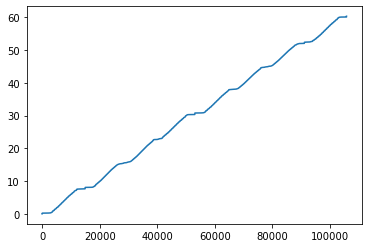

In [22]:
tw_RUN3.muy.plot()

In [23]:
(float(tw_RUN3[tw_RUN3.name == TCCS_name]['muy']) % 1) * 2*np.pi

4.676135957010215